In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import colorsys

from scripts import *
from harmonies import *
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

plt.rcParams['figure.figsize'] = 20, 5

# Paleta de Analisis

In [5]:
cube_palette, pd_cube, final_analysis_array, final_analysis_palette, final_analysis_names, inverse_map = get_hue_palette_cube(sorted(np_itten_color_wheel[:,0])[::-1])


In [ ]:
itten_color_wheel_map = {
    'negros'
}

In [23]:
final_analysis_names

['negros',
 'grises',
 'blancos',
 'hue_0',
 'hue_1',
 'hue_2',
 'hue_3',
 'hue_4',
 'hue_5',
 'hue_6',
 'hue_7',
 'hue_8',
 'hue_9',
 'hue_10',
 'hue_11']

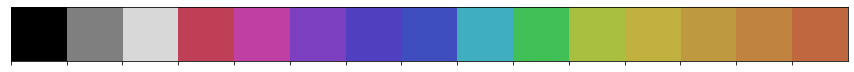

In [6]:
sns.palplot(get_palette(final_analysis_palette))

# Carga archivos

In [7]:
cam = glob.glob('../../../../photos/cam/*.jpg')

In [8]:
def get_image_signature(img_path, preprocess=preprocess_img_hls, analysis_palette=np_itten_color_wheel, apply_sin_to_hue=True):
    img_rgb, img_hls = get_img(img_path)

    quantized_img = get_color_wheel_quantized_img(preprocess(img_hls), color_wheel=analysis_palette, apply_sin_to_hue=apply_sin_to_hue)
    signature = dict(zip(*np.unique(quantized_img, return_counts=True)))

    return signature

def get_image_signatures(img_list, preprocess=preprocess_img_hls, analysis_palette=np_itten_color_wheel, apply_sin_to_hue=True):
    signatures = []
    
    results = joblib.Parallel(n_jobs=12)(joblib.delayed(get_image_signature)(img_path, analysis_palette=analysis_palette, apply_sin_to_hue=apply_sin_to_hue) for img_path in tqdm(img_list))
            
    return results

In [9]:
signatures = get_image_signatures(cam, analysis_palette=cube_palette)

100%|██████████| 1537/1537 [05:05<00:00,  5.03it/s]


In [10]:
pd_signatures = pd.DataFrame(signatures).fillna(0)

In [11]:
for name, indices, _ in final_analysis_array:
    pd_signatures[name] = pd_signatures[indices].sum(axis=1)

In [12]:
pd_discretized_signature = pd_signatures[final_analysis_names[3:]]
pd_discretized_total_signature = pd_signatures[final_analysis_names]

In [13]:
pd_discr_weighted_signatures = pd_discretized_signature.apply(lambda x: x/x.sum(), axis=1).fillna(0)
pd_discr_weighted_total_signatures = pd_discretized_total_signature.apply(lambda x: x/x.sum(), axis=1)

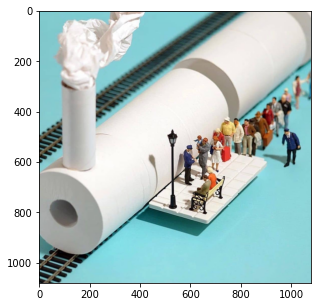

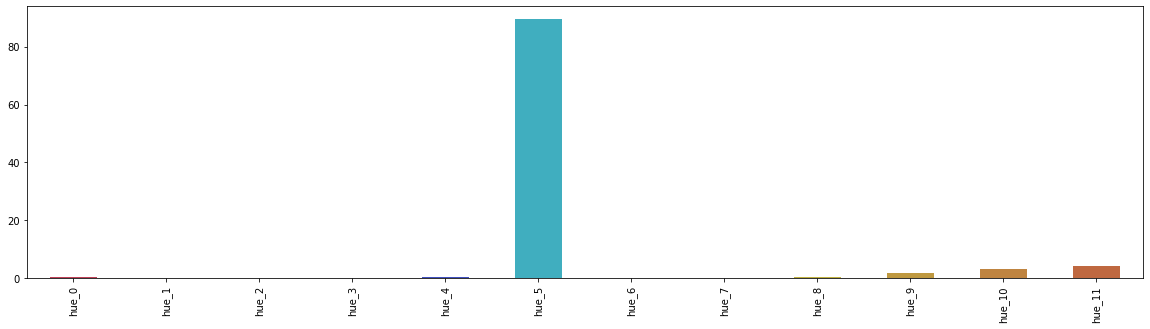

hue_0      0.243227
hue_1      0.004660
hue_2      0.010810
hue_3      0.100646
hue_4      0.508074
hue_5     89.428855
hue_6      0.063929
hue_7      0.026280
hue_8      0.432217
hue_9      1.748438
hue_10     3.126910
hue_11     4.305955
Name: 141, dtype: float64


In [14]:
img_idx = 141

plt.imshow(get_img(cam[img_idx])[0])
plt.show()

(pd_discr_weighted_signatures.iloc[img_idx]*100).plot.bar(color=get_palette(final_analysis_palette[3:]))
plt.show()
print((pd_discr_weighted_signatures.iloc[img_idx]*100))

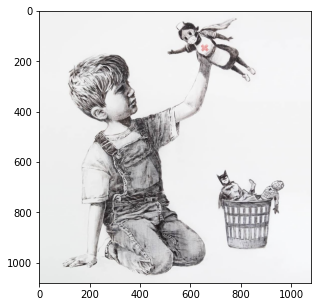

ValueError: XB must be a 2-dimensional array.

In [15]:
img_idx = 46
#img_idx = 11
#img_idx = 46

plt.imshow(get_img(cam[img_idx])[0])
plt.show()

get_rgb_quantize_img_twice(get_img(cam[img_idx])[1])
plt.show()

(pd_discr_weighted_total_signatures.iloc[img_idx]*100).plot.bar(color=get_palette(final_analysis_palette))
plt.show()
print((pd_discr_weighted_signatures.iloc[img_idx]*100))

<AxesSubplot:>

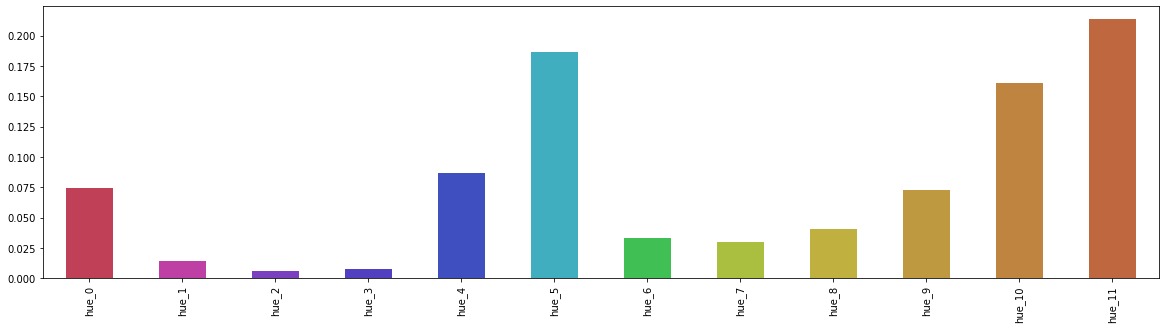

In [19]:
pd_discr_weighted_signatures.mean().plot.bar(color=get_palette(final_analysis_palette[3:]))

<AxesSubplot:>

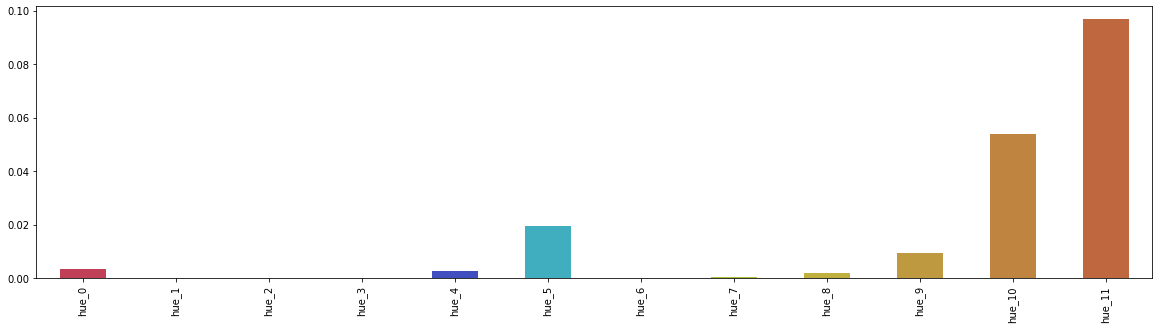

In [16]:
pd_discr_weighted_signatures.median().plot.bar(color=get_palette(final_analysis_palette[3:]))

In [20]:
pd_weighted_signatures = pd_signatures.apply(lambda x: x/x.sum(), axis=1)

# Otros

In [26]:
check_relaciones = pd_discr_weighted_signatures.copy()

umbral = 0.01

check_relaciones['monochromatic'] = (1*(pd_discr_weighted_signatures > umbral)).apply(monochromatic, axis=1)
check_relaciones['analogous'] = (1*(pd_discr_weighted_signatures > umbral)).apply(analogous, axis=1)
check_relaciones['complementary'] = (1*(pd_discr_weighted_signatures > umbral)).apply(complementary, axis=1)
check_relaciones['splitComplementary'] = (1*(pd_discr_weighted_signatures > umbral)).apply(splitComplementary, axis=1)
check_relaciones['triad'] = (1*(pd_discr_weighted_signatures > umbral)).apply(triad, axis=1)
check_relaciones['square'] = (1*(pd_discr_weighted_signatures > umbral)).apply(square, axis=1)
check_relaciones['rectangular'] = (1*(pd_discr_weighted_signatures > umbral)).apply(rectangular, axis=1)


<AxesSubplot:>

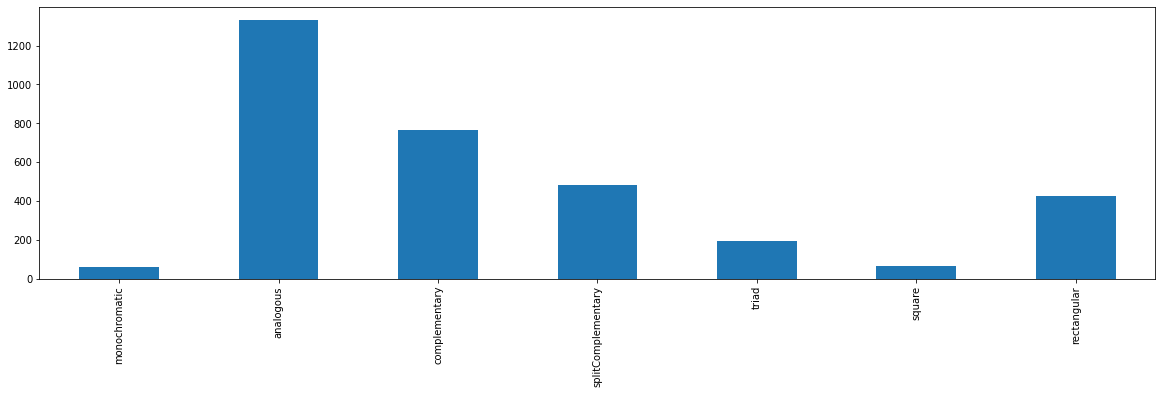

In [27]:
check_relaciones[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular']].sum().plot.bar()